# Car Prices Estimation using Linear Regression

### The goal of this project is to estimate used car prices based on several of its features described below, While also extracting insights about the influence of these features on the car price .

## Dataset Description

The dataset contains historical car auction sales prices, scraped from the outside internet sources and collected in 2015.

Each row represents a sale at a used car auction. Each column is described below.

| Column       | Description                                                                                          |
| ------------ | ---------------------------------------------------------------------------------------------------- |
| year         | Car's year of production                                                                             |
| make         | Car make/brand                                                                                       |
| model        | Car model                                                                                            |
| trim         | Car's trim or grade, which specifies a car model's level of performance, features, options or extras |
| body         | Car body type (e.g. Sedan, SUV, Coupe, etc.)                                                         |
| transmission | Car transmission type. The mechanism that moves the power from the engine to the wheels.             |
| vin          | Vehicle Identification Number, a unique code to identify individual motor vehicles.                  |
| state        | The state in which the car was auctioned.                                                            |
| condition    | The condition of the cars being at the time of auction, 5 being the best score and 1 being the worst.|
| odometer     | The distance traveled by a vehicle since being manufactured, in miles                                |
| color        | Exterior color of the car                                                                            |
| interior     | Interior color of the car                                                                            |
| seller       | The seller of the car or car dealer                                                                  |
| mmr          | Manheim\* Market Report, the market estimated price of the cars. An indicator of wholesale prices.   |
| sellingprice | The price a car was sold at in auction.                                                              |
| saledate     | The date on which the car has been sold.                                                             |

\*Manheim is a company established in 1945 as a car auction company. It has grown to a very reputable company in the industry and its MMR estimate is a baseline tool for wholesale car price determination. They base their price calculations on over 10 million transaction over the past 13-month period.


## Importing Libraries

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.ticker as mticker
%matplotlib inline
plt.style.use("seaborn-v0_8")

## Loading the dataset

In [149]:
#df = pd.read_csv('https://raw.githubusercontent.com/TameemAlghazaly/Data-Science-Projects/main/Car%20Prices%20Linear%20Regression/car_prices.csv')
df = pd.read_csv('car_prices.csv')
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,gray,the hertz corporation,$11000,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,—,award auto sales and leasing inc,$28700,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,black,lexus financial services,$22200,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,black,peddle llc,$3675,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,gray,u-haul,$22500,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


## Cleaning the dataset




In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46578 entries, 0 to 46577
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          46578 non-null  int64  
 1   make          46578 non-null  object 
 2   model         46578 non-null  object 
 3   trim          46578 non-null  object 
 4   body          46578 non-null  object 
 5   transmission  46578 non-null  object 
 6   vin           46578 non-null  object 
 7   state         46578 non-null  object 
 8   condition     46578 non-null  float64
 9   odometer      46578 non-null  object 
 10  color         46578 non-null  object 
 11  interior      46578 non-null  object 
 12  seller        46578 non-null  object 
 13  mmr           46578 non-null  object 
 14  sellingprice  46578 non-null  object 
 15  saledate      46578 non-null  object 
dtypes: float64(1), int64(1), object(14)
memory usage: 5.7+ MB


In [151]:
df["odometer"] = df["odometer"].str.extract('(\d+)',expand=False).astype(int)
df["sellingprice"] = df["sellingprice"].str.extract('(\d+)',expand=False).astype(int)
df["mmr"] = df["mmr"].str.extract('(\d+)',expand=False).astype(int)
df['saledate'] = pd.to_datetime(df['saledate'],utc = True,format="mixed")
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404,black,gray,the hertz corporation,11000,10900,2015-06-01 19:30:00+00:00
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846,gray,—,award auto sales and leasing inc,28700,29900,2015-02-17 23:15:00+00:00
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122,silver,black,lexus financial services,22200,24200,2015-01-19 17:30:00+00:00
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303,black,black,peddle llc,3675,3200,2015-03-03 23:10:00+00:00
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714,white,gray,u-haul,22500,22100,2015-02-17 22:45:00+00:00


In [152]:
for col in df.select_dtypes(include='object').columns:
  print(f"Unique values in column '{col}':")
  print(df[col].unique())
  print("-" * 30)

Unique values in column 'make':
['Hyundai' 'Toyota' 'Lexus' 'BMW' 'Ford' 'Kia' 'Chevrolet' 'Cadillac'
 'Mercedes-Benz' 'Jeep' 'Infiniti' 'Lincoln' 'Mazda' 'Chrysler' 'GMC'
 'Honda' 'Dodge' 'Audi' 'Nissan' 'Buick' 'MINI' 'Jaguar' 'Volvo'
 'Mitsubishi' 'Volkswagen' 'Subaru' 'Porsche' 'Isuzu' 'Saturn' 'Pontiac'
 'Scion' 'Acura' 'Ram' 'Land Rover' 'Suzuki' 'Mercury' 'HUMMER' 'Saab'
 'Maserati' 'FIAT' 'Geo' 'smart' 'Oldsmobile' 'Fisker' 'Bentley'
 'Plymouth' 'Ferrari' 'Aston Martin']
------------------------------
Unique values in column 'model':
['Sonata' '4Runner' 'IS 250' 'X5' 'E-Series Van' 'Optima' 'Avalanche'
 'CTS' 'E-Class' 'Forte' 'Wrangler' 'G Sedan' 'MKS' 'Soul' 'Ranger'
 'Mazda6' 'Tundra' 'PT Cruiser' 'Acadia' 'Mustang' 'Odyssey' 'X3' 'STS'
 'F-150' 'Sienna' 'Liberty' 'DTS' 'Sebring' 'Nitro' 'Tacoma' 'Elantra'
 'Q7' 'Maxima' 'Corvette' 'Grand Cherokee' 'FJ Cruiser' 'Fiesta' 'Genesis'
 'Town and Country' 'F-350 Super Duty' 'Z4' 'Murano' 'Enclave' 'Altima'
 'Sentra' 'R-Class' 'Sie

In [153]:
for col in df.select_dtypes(include='object'):
  unique_count = df[col].nunique()
  total_count = len(df)
  percentage_unique = (unique_count / total_count) * 100
  print(f" '{col}' has: {percentage_unique:.2f}% unique values")

 'make' has: 0.10% unique values
 'model' has: 1.39% unique values
 'trim' has: 2.36% unique values
 'body' has: 0.15% unique values
 'transmission' has: 0.00% unique values
 'vin' has: 100.00% unique values
 'state' has: 0.07% unique values
 'color' has: 0.04% unique values
 'interior' has: 0.04% unique values
 'seller' has: 10.06% unique values


In [154]:
df=df.replace("—",np.nan)
df.isnull().sum()

,0
year,0
make,0
model,0
trim,0
body,0
transmission,0
vin,0
state,0
condition,0
odometer,0


In [155]:
df.isnull().sum()/len(df)*100

,0
year,0.000000
make,0.000000
model,0.000000
trim,0.000000
body,0.000000
transmission,0.000000
vin,0.000000
state,0.000000
condition,0.000000
odometer,0.000000


#### Filling the missing values with the most popular value

In [156]:
df['color'] = df['color'].fillna(df['color'].mode()[0])

In [157]:
df['interior'] = df['interior'].fillna(df['interior'].mode()[0])

#### Reducing the number of body types to a few main types

In [158]:
df["body"].unique()

array(['sedan', 'SUV', 'Sedan', 'E-Series Van', 'Crew Cab', 'suv',
       'G Sedan', 'Wagon', 'Regular Cab', 'Double Cab', 'wagon', 'Coupe',
       'Minivan', 'SuperCrew', 'coupe', 'convertible', 'Extended Cab',
       'Hatchback', 'van', 'hatchback', 'Van', 'Convertible', 'SuperCab',
       'g sedan', 'king cab', 'G Convertible', 'King Cab', 'extended cab',
       'quad cab', 'supercab', 'Beetle Convertible', 'minivan', 'G Coupe',
       'Quad Cab', 'crew cab', 'supercrew', 'CrewMax Cab', 'double cab',
       'g coupe', 'Club Cab', 'Access Cab', 'Genesis Coupe',
       'e-series van', 'G37 Convertible', 'Cab Plus 4', 'crewmax cab',
       'genesis coupe', 'promaster cargo van', 'access cab', 'Mega Cab',
       'Koup', 'regular cab', 'mega cab', 'Elantra Coupe',
       'Q60 Convertible', 'regular-cab', 'Promaster Cargo Van', 'Xtracab',
       'CTS Coupe', 'CTS Wagon', 'GranTurismo Convertible',
       'beetle convertible', 'TSX Sport Wagon', 'g convertible',
       'tsx sport wagon', '

In [159]:
df["body"]= df["body"].str.lower()

In [160]:
body=["sedan","coupe", "convertible", "hatchback", "suv", "wagon","koup","van","cab","crew"]
keyword = '|'.join(r"{}".format(x) for x in body)

df['body'] = df['body'].str.extract('('+ keyword + ')', expand=False)

In [161]:
df["body"].unique()

array(['sedan', 'suv', 'van', 'crew', 'wagon', 'cab', 'coupe',
       'convertible', 'hatchback', 'koup'], dtype=object)

In [162]:
df["body"]= df["body"].replace("crew","cab")
df["body"].unique()

array(['sedan', 'suv', 'van', 'cab', 'wagon', 'coupe', 'convertible',
       'hatchback', 'koup'], dtype=object)

In [163]:
df["body"]= df["body"].replace("koup","coupe")
df["body"].unique()

array(['sedan', 'suv', 'van', 'cab', 'wagon', 'coupe', 'convertible',
       'hatchback'], dtype=object)

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46578 entries, 0 to 46577
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   year          46578 non-null  int64              
 1   make          46578 non-null  object             
 2   model         46578 non-null  object             
 3   trim          46578 non-null  object             
 4   body          46578 non-null  object             
 5   transmission  46578 non-null  object             
 6   vin           46578 non-null  object             
 7   state         46578 non-null  object             
 8   condition     46578 non-null  float64            
 9   odometer      46578 non-null  int64              
 10  color         46578 non-null  object             
 11  interior      46578 non-null  object             
 12  seller        46578 non-null  object             
 13  mmr           46578 non-null  int64              
 14  sellin

In [165]:
df.describe()

,year,condition,odometer,mmr,sellingprice
count,46578.000000,46578.000000,46578.000000,46578.000000,46578.000000
mean,2010.203401,3.424265,66850.642621,13810.580102,13669.705204
std,3.831316,0.944009,51868.395670,9510.332473,9632.257208
min,1990.000000,1.000000,1.000000,25.000000,150.000000
25%,2008.000000,2.700000,28185.000000,7400.000000,7100.000000
50%,2012.000000,3.600000,51193.000000,12300.000000,12200.000000
75%,2013.000000,4.200000,97146.500000,18250.000000,18200.000000
max,2015.000000,5.000000,999999.000000,146000.000000,230000.000000


## Exploring the Dataset


Text(191.09722222222223, 0.5, 'Selling Count')

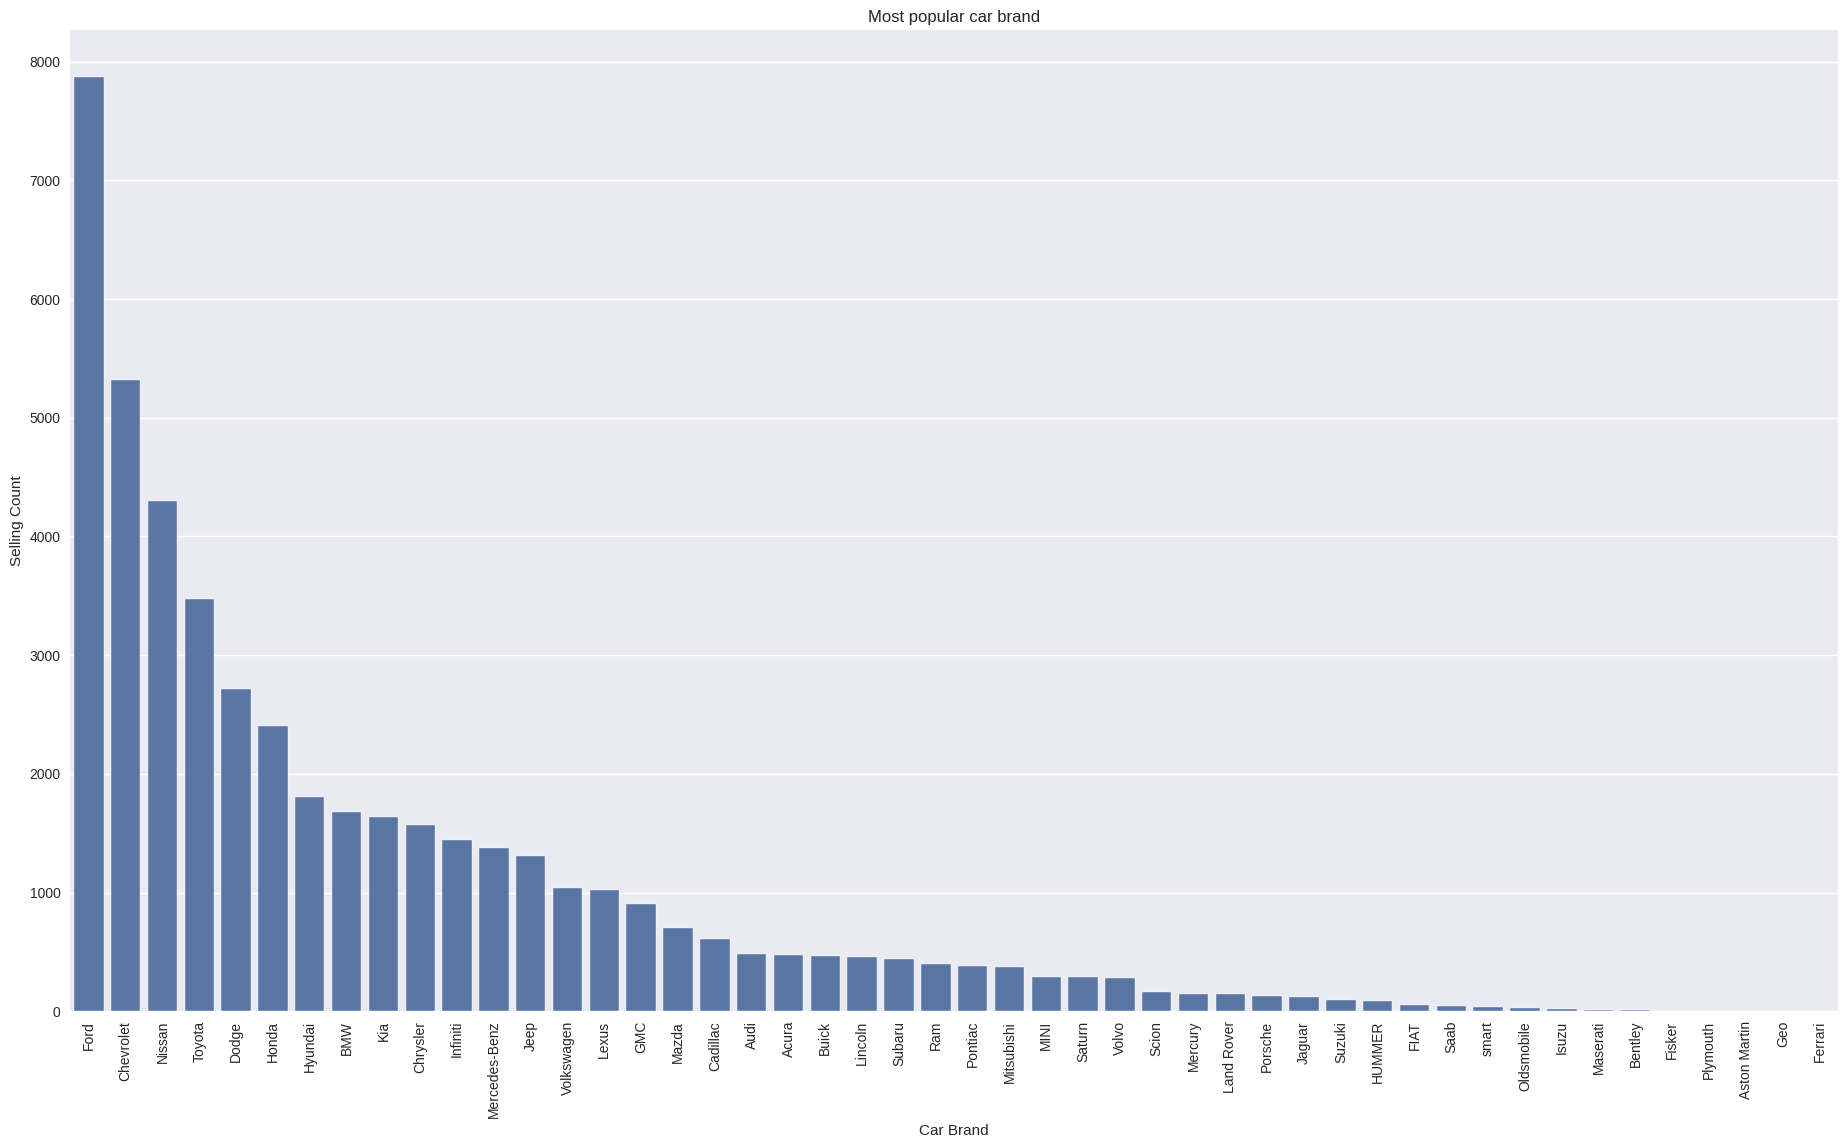

In [166]:
f = plt.figure(figsize=(19,12))
large_to_small = df.groupby('make').size().sort_values(ascending=False)
sns.countplot(x='make', data=df, order=large_to_small.index).set(title='Most popular car brand')
plt.xticks(rotation=90)
plt.tight_layout()
plt.xlabel('Car Brand')
plt.ylabel('Selling Count')

**We can see that Ford and Chevrolet are the most common sold types.**

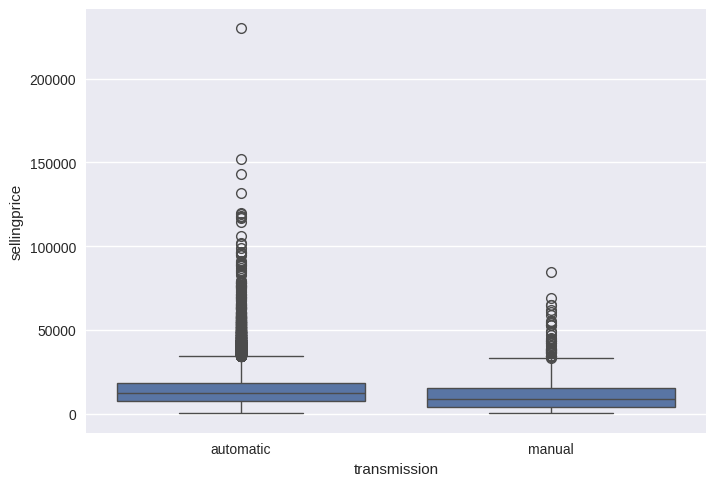

In [167]:
ax= sns.boxplot(x="transmission",y="sellingprice",data=df)

**Automatic cars on average have slightly higher prices than manual cars.**

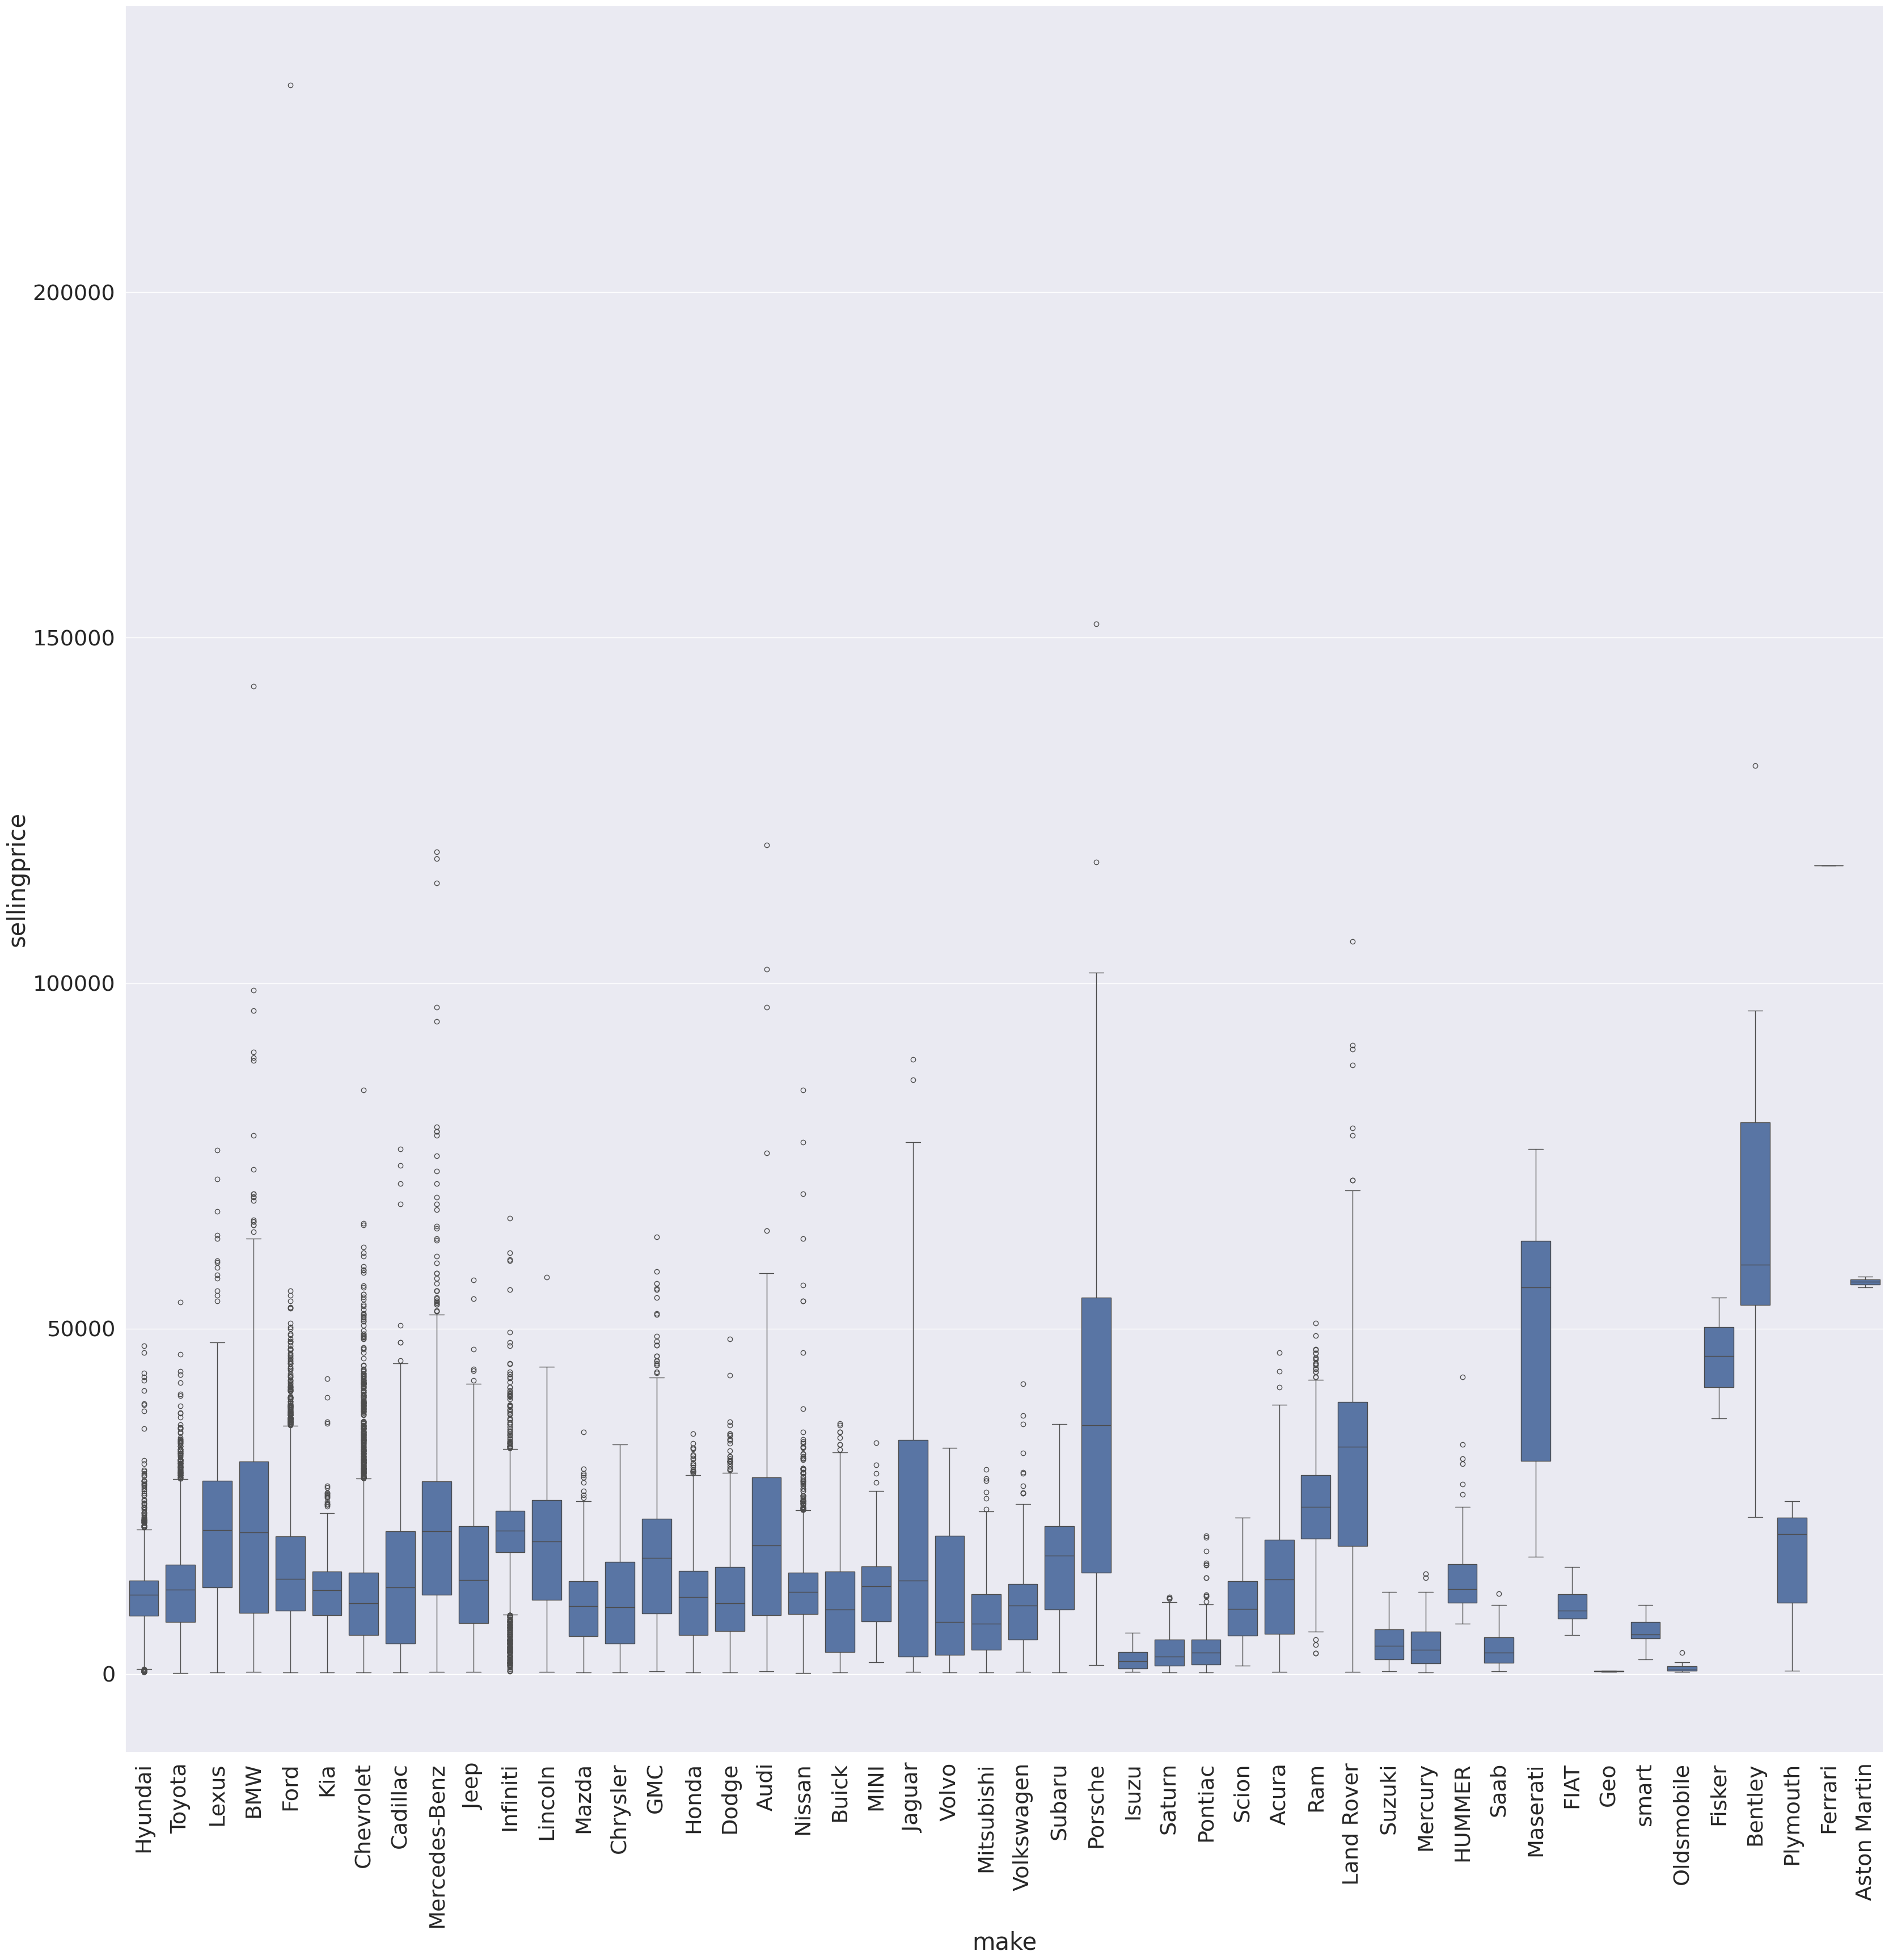

In [168]:
sns.set(font_scale=2.5)
plt.figure(figsize=(40,40))
Boxplot= sns.boxplot(x="make", y="sellingprice", data=df)
plt.xticks(rotation=90);

**It appears that Bently, Massarati and Aston Martin are some of the Higher end Brands with higher prices.**

**While Isuzu, Oldsmobile and Geo are some of the lowest price Brands.**

**We can also see that the boxplots of Porche and Maserati are the widest distributed boxes which means they cover a higher range of values.**

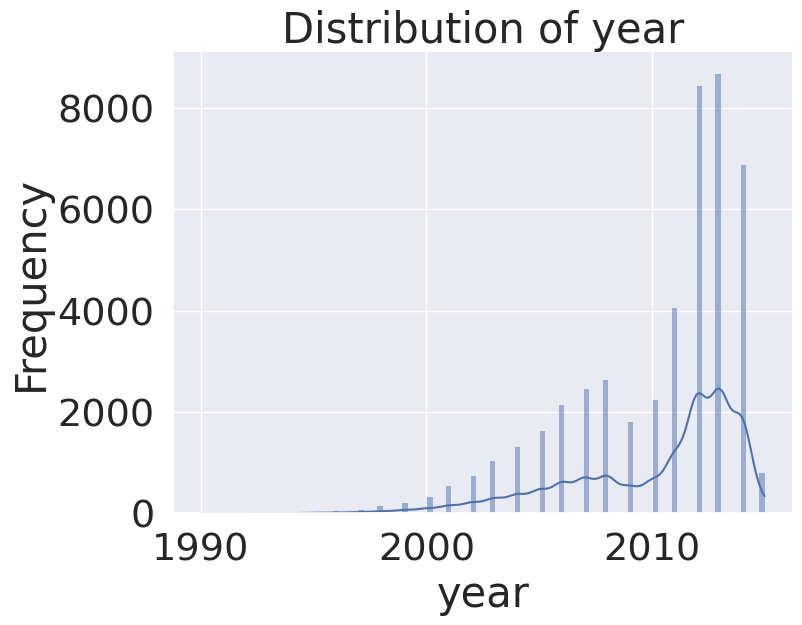

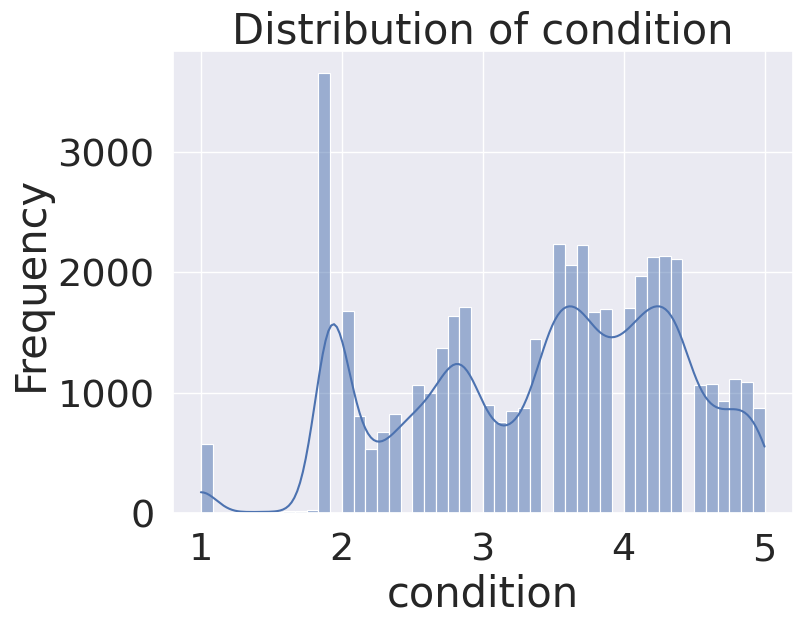

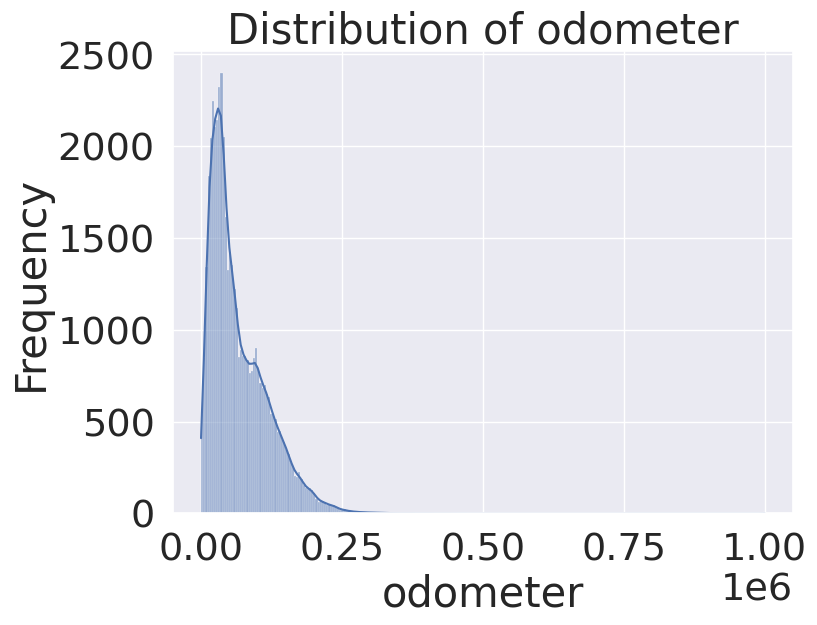

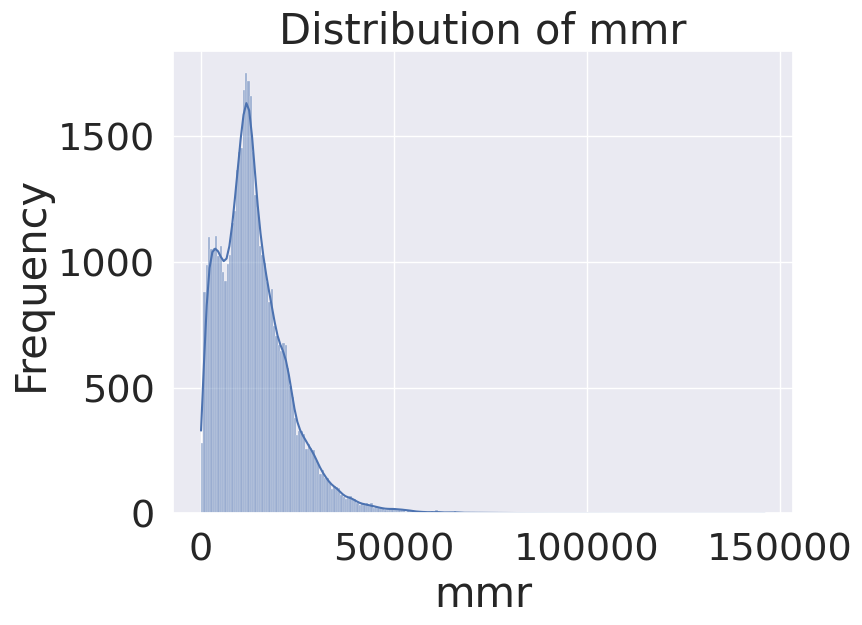

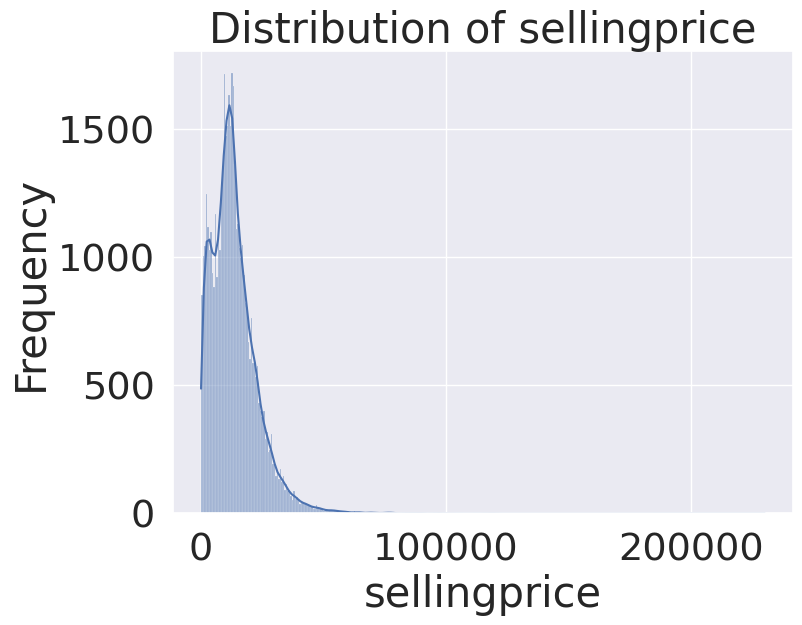

In [169]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

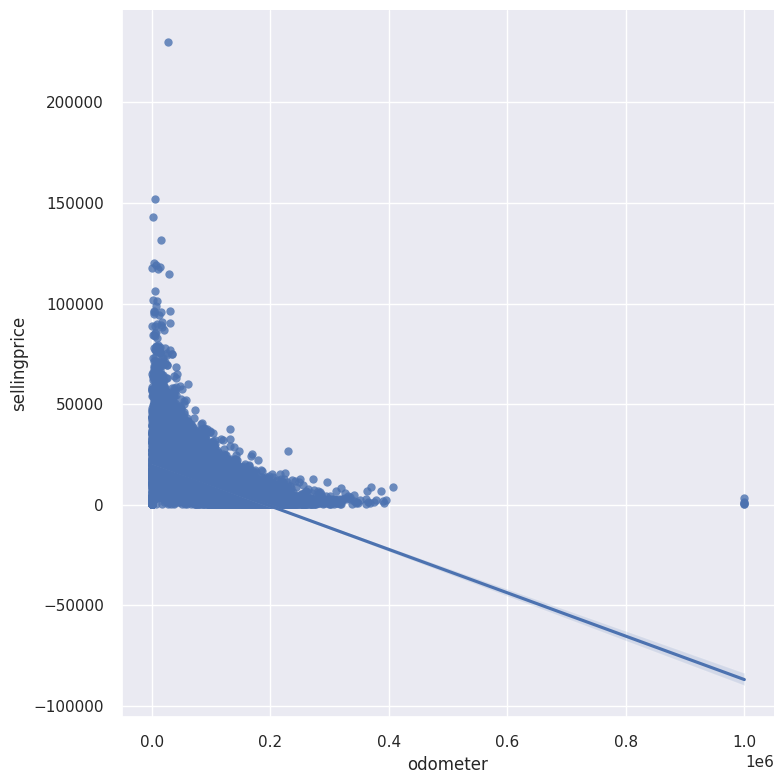

In [170]:
sns.set(font_scale=1)
sns.lmplot(x="odometer",y="sellingprice",data=df,height=8);

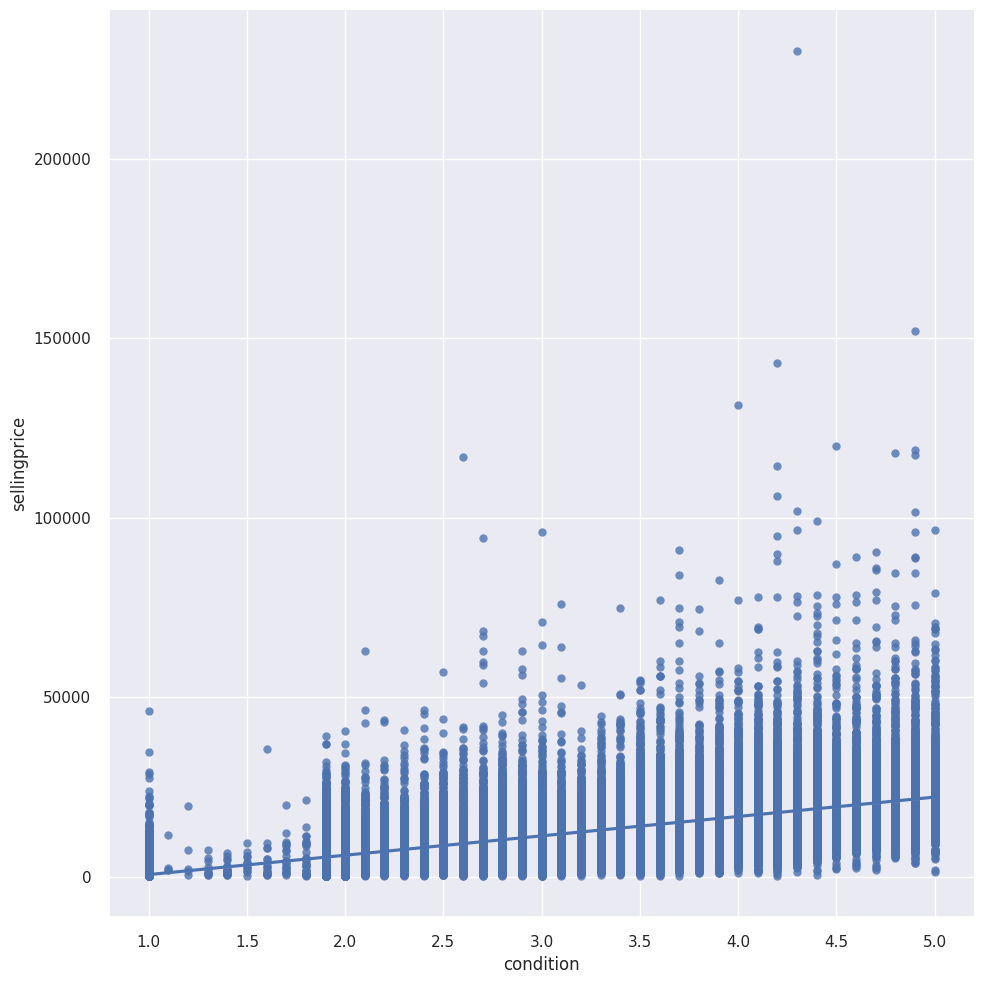

In [171]:
sns.lmplot(x="condition",y="sellingprice",data=df,height=10)

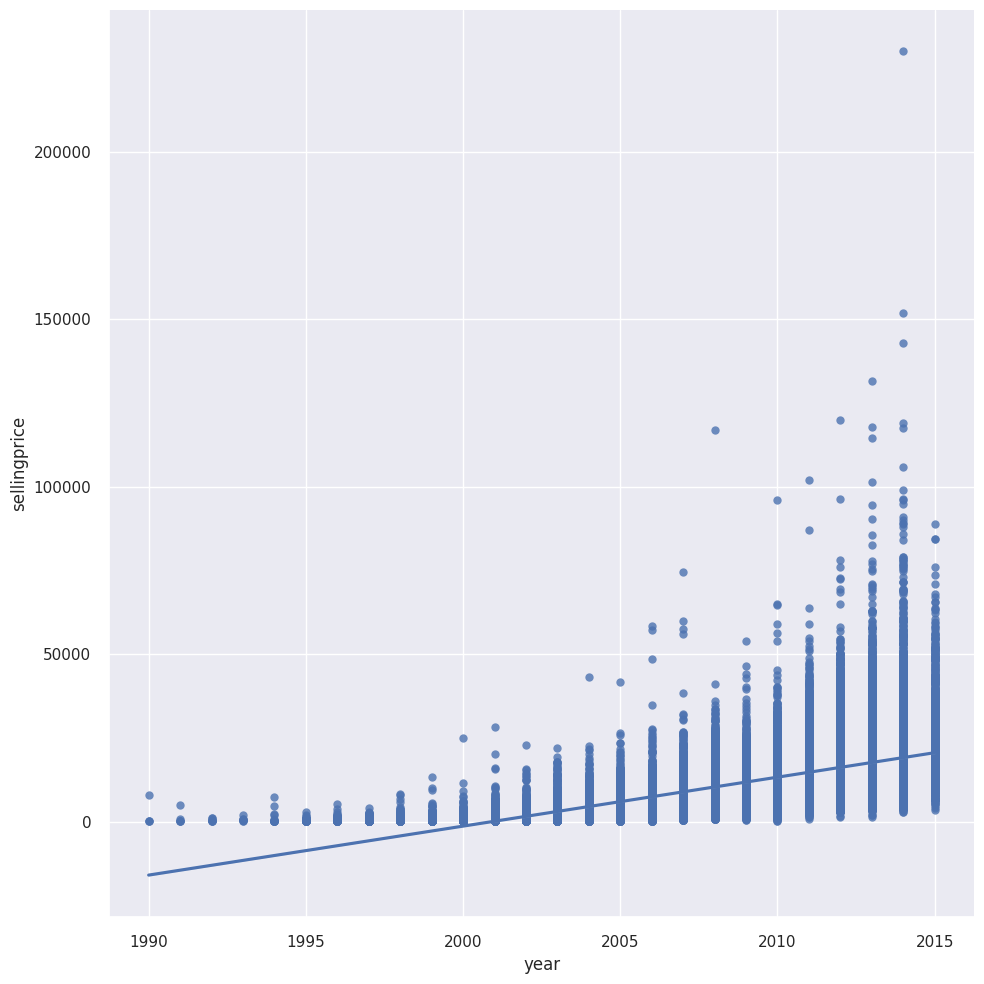

In [172]:
sns.lmplot(x="year",y="sellingprice",data=df,height=10)

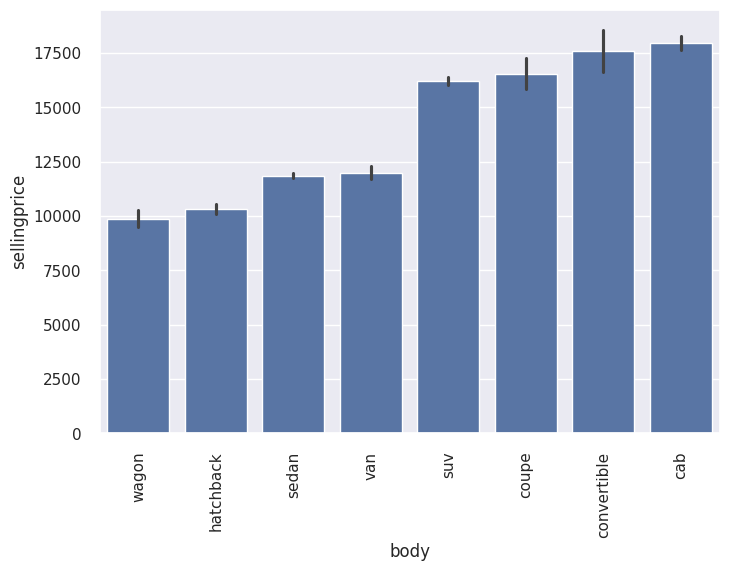

In [173]:
order= df[["body","sellingprice"]].groupby('body').mean().sort_values("sellingprice").index

ax= sns.barplot(x="body",y="sellingprice",data=df,order=order)
plt.xticks(rotation=90);

**From the graph we can see that Cabs and Convertible cars have higher prices.**

### We can drop outliers in order to visualize better

In [174]:
df.drop(df.index[df["odometer"]>800000], inplace = True)

In [175]:
df.drop(df.index[df["sellingprice"]>200000], inplace = True)

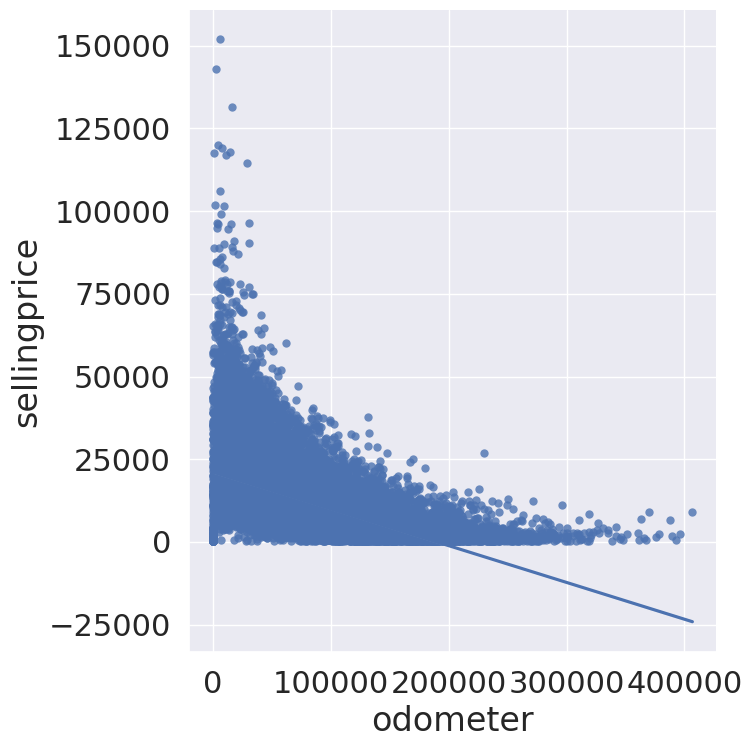

In [176]:
sns.set(font_scale=2)
sns.lmplot(x="odometer",y="sellingprice",data=df,height=8);

**There is a negative correlation between the odometer and the selling price, this means that the higher the odometer reading in a car the lower its price.**

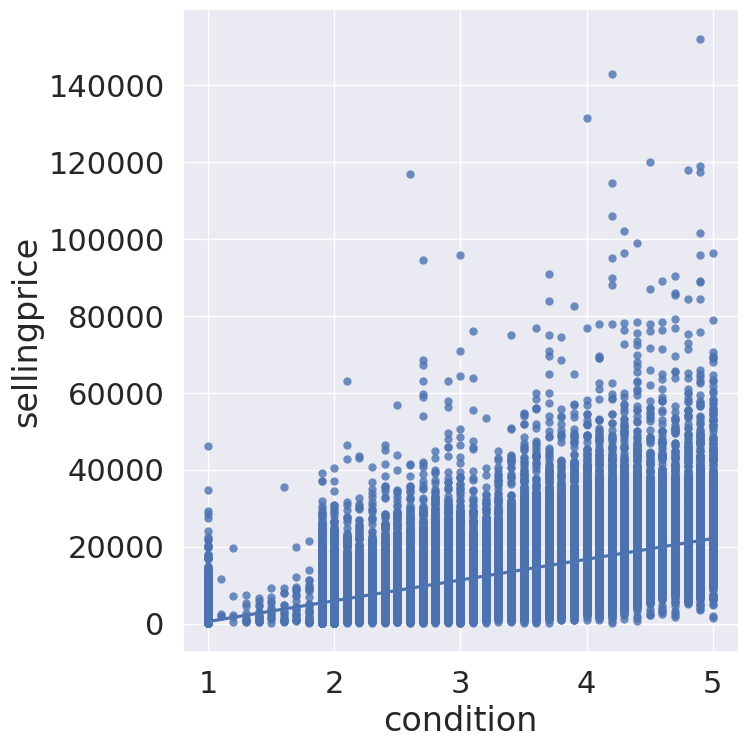

In [177]:
sns.lmplot(x="condition",y="sellingprice",data=df,height=8);

**While the correlation between the condition of the car and its price is positive, the higher the condition the higher the price.**

#### Visualizing the correlation of columns with the price.

<Axes: >

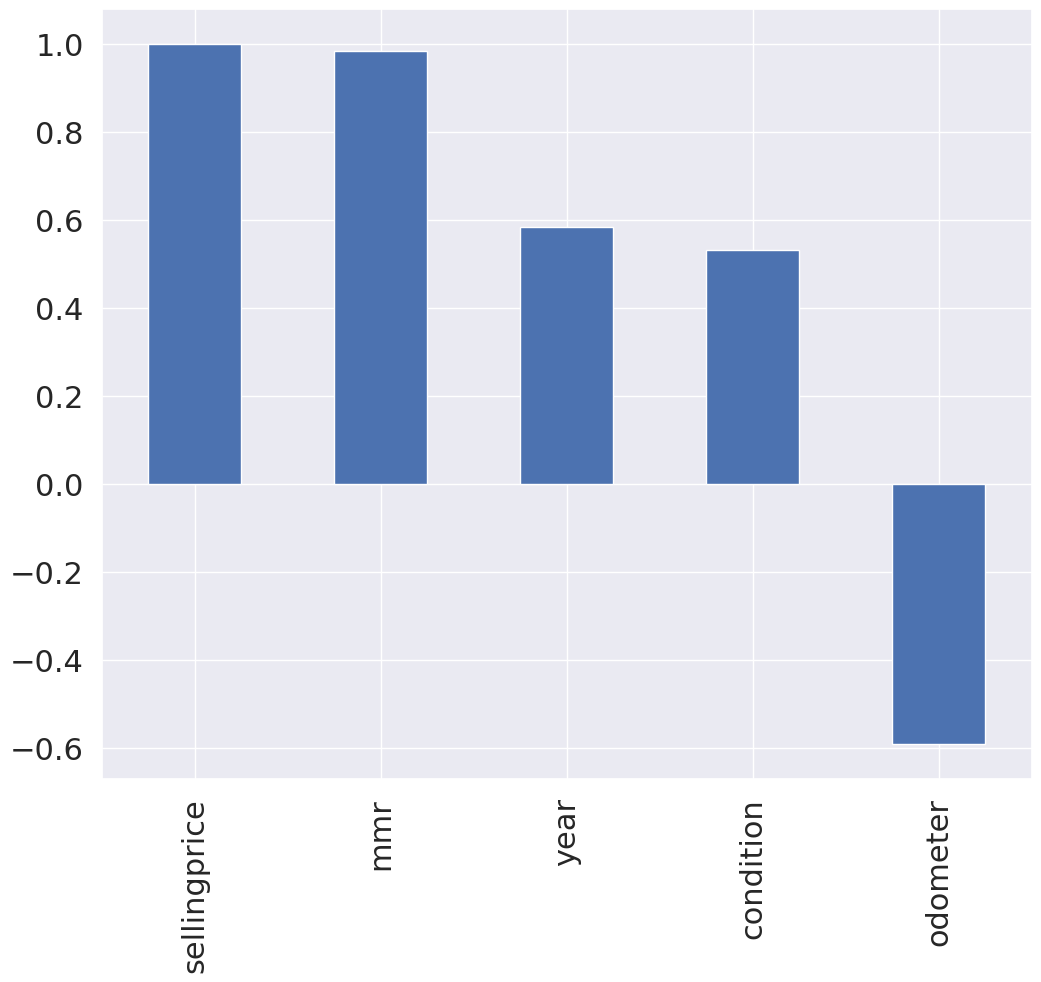

In [178]:
plt.figure(figsize=(12,10))
df.corr(numeric_only= True)['sellingprice'].sort_values(ascending = False).plot(kind='bar')

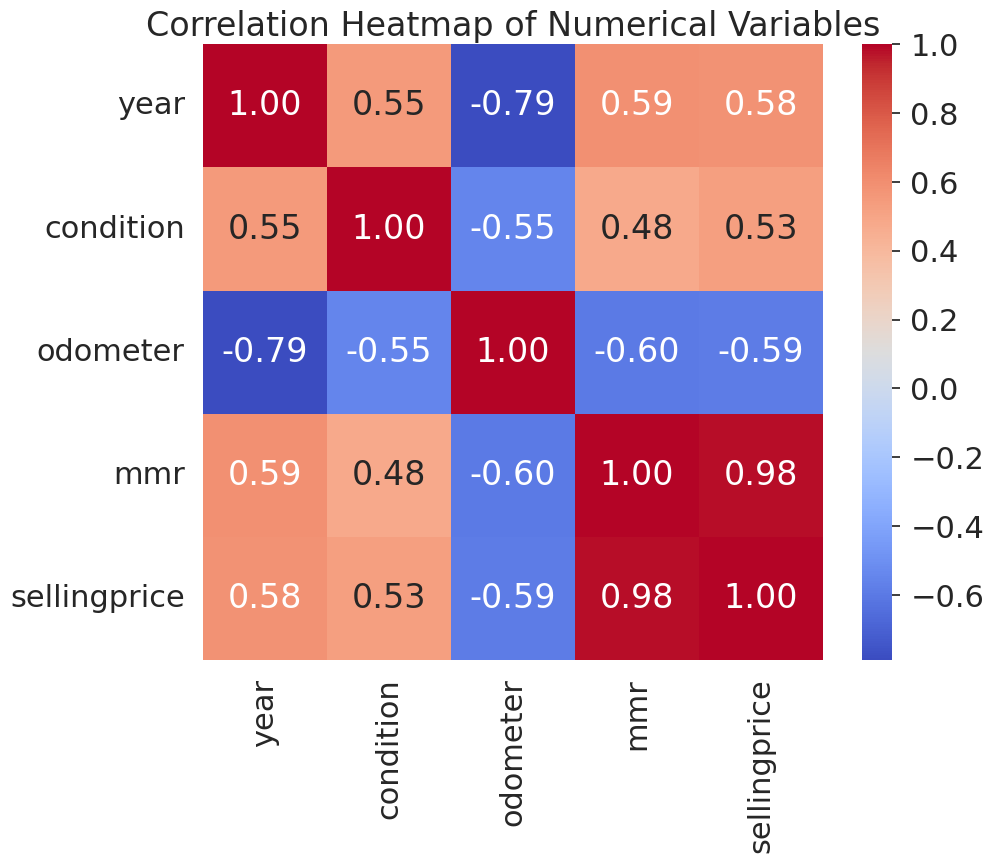

In [179]:
# prompt: heatmap for the numerical variable correlation

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

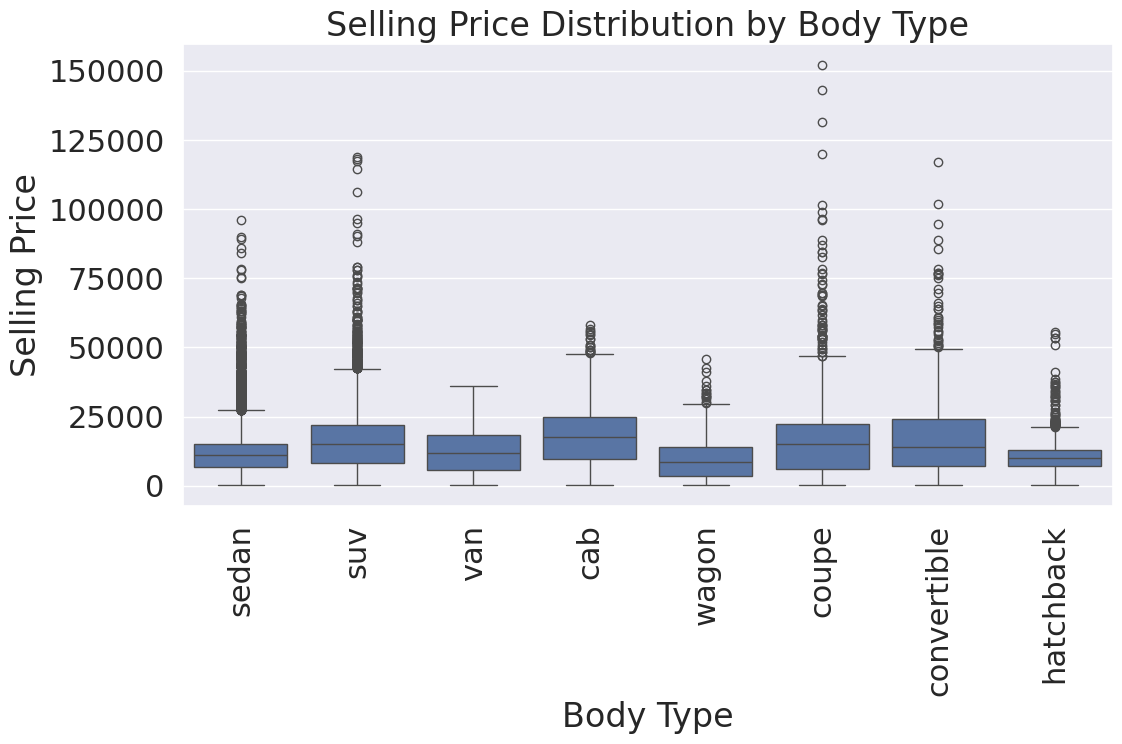

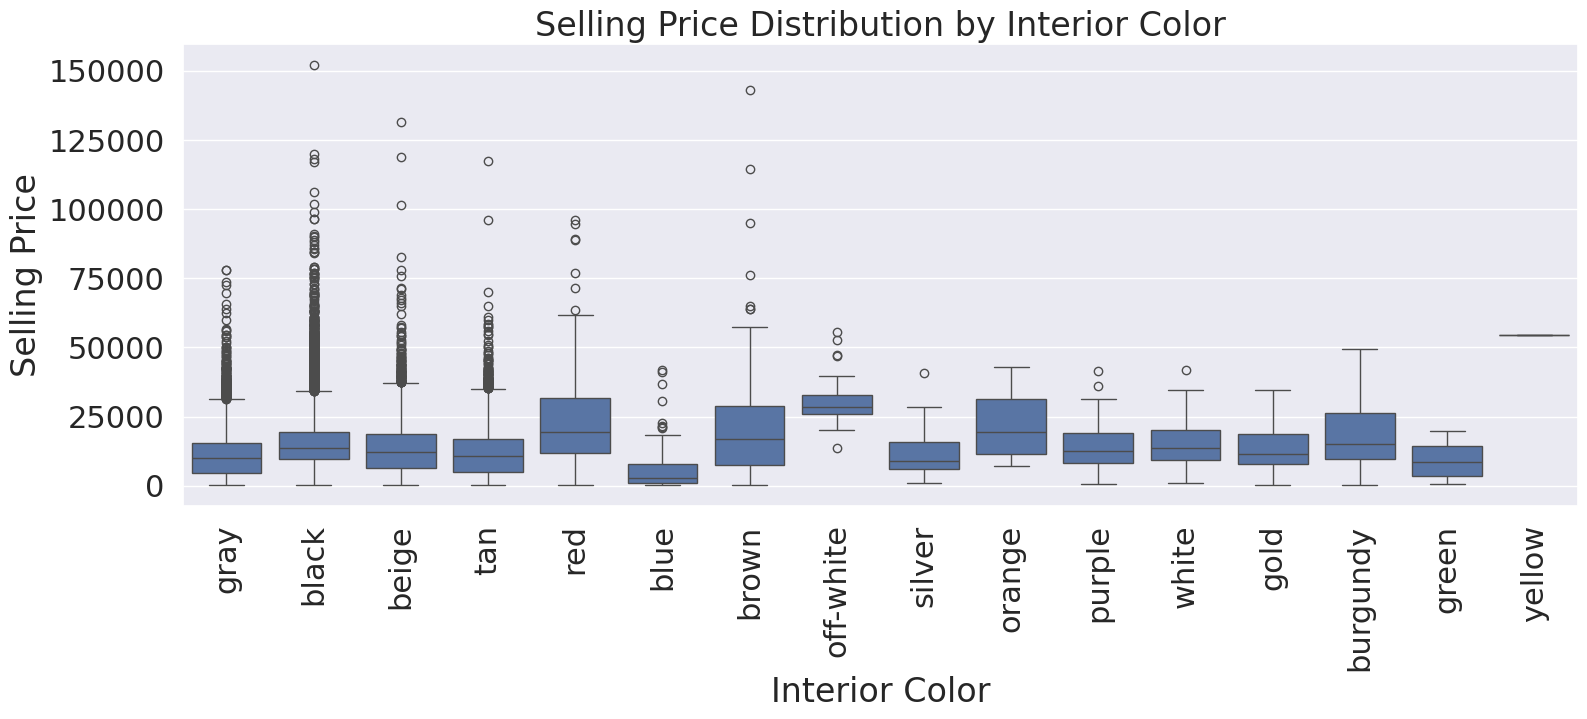

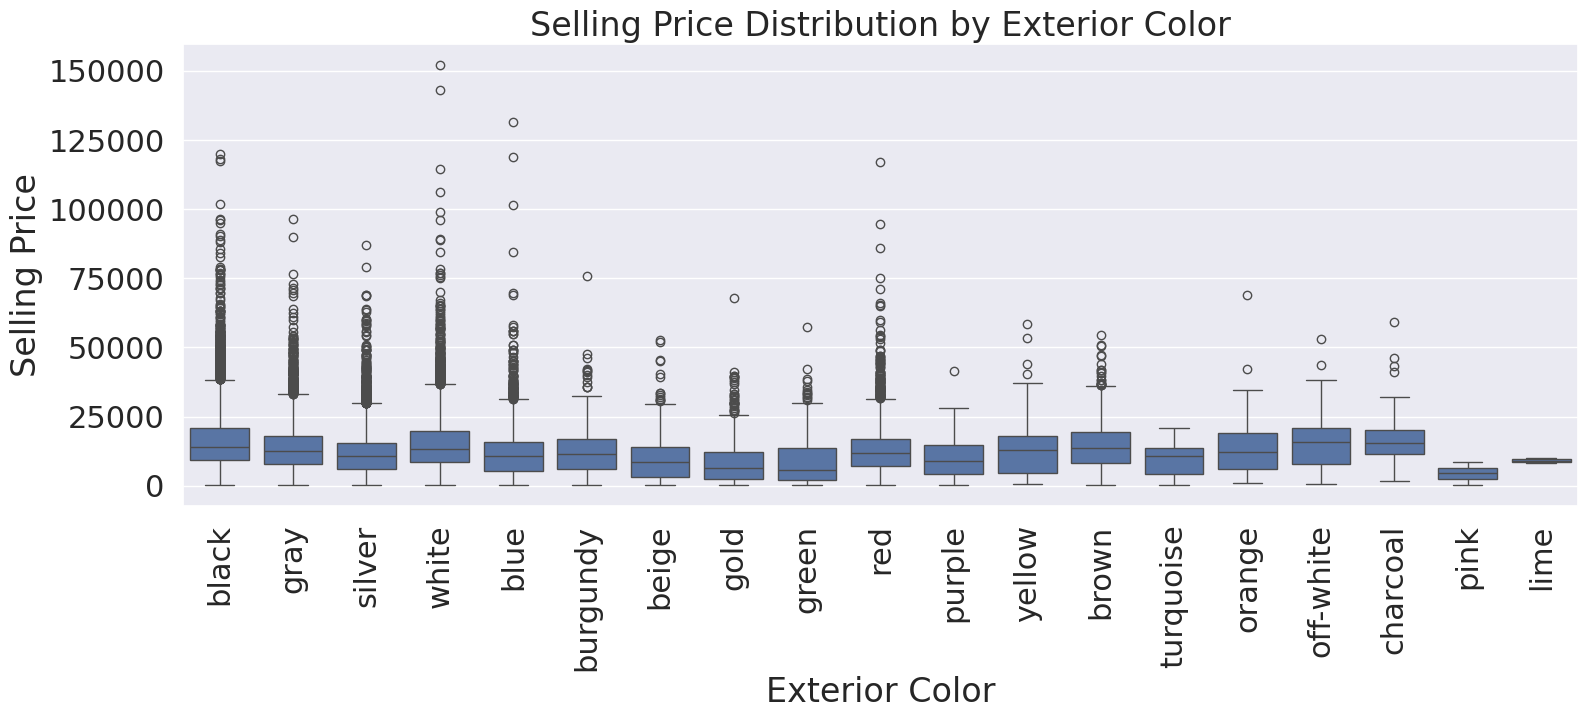

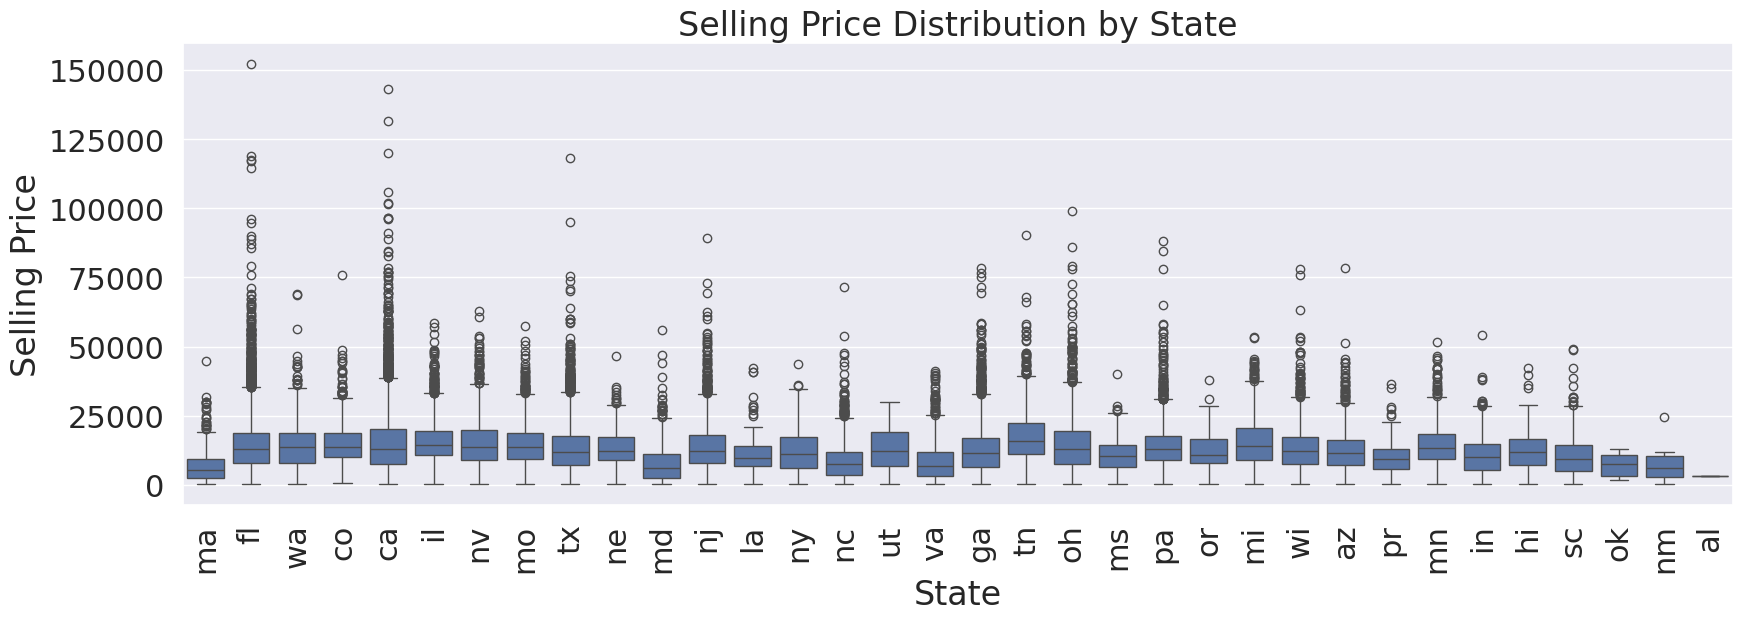

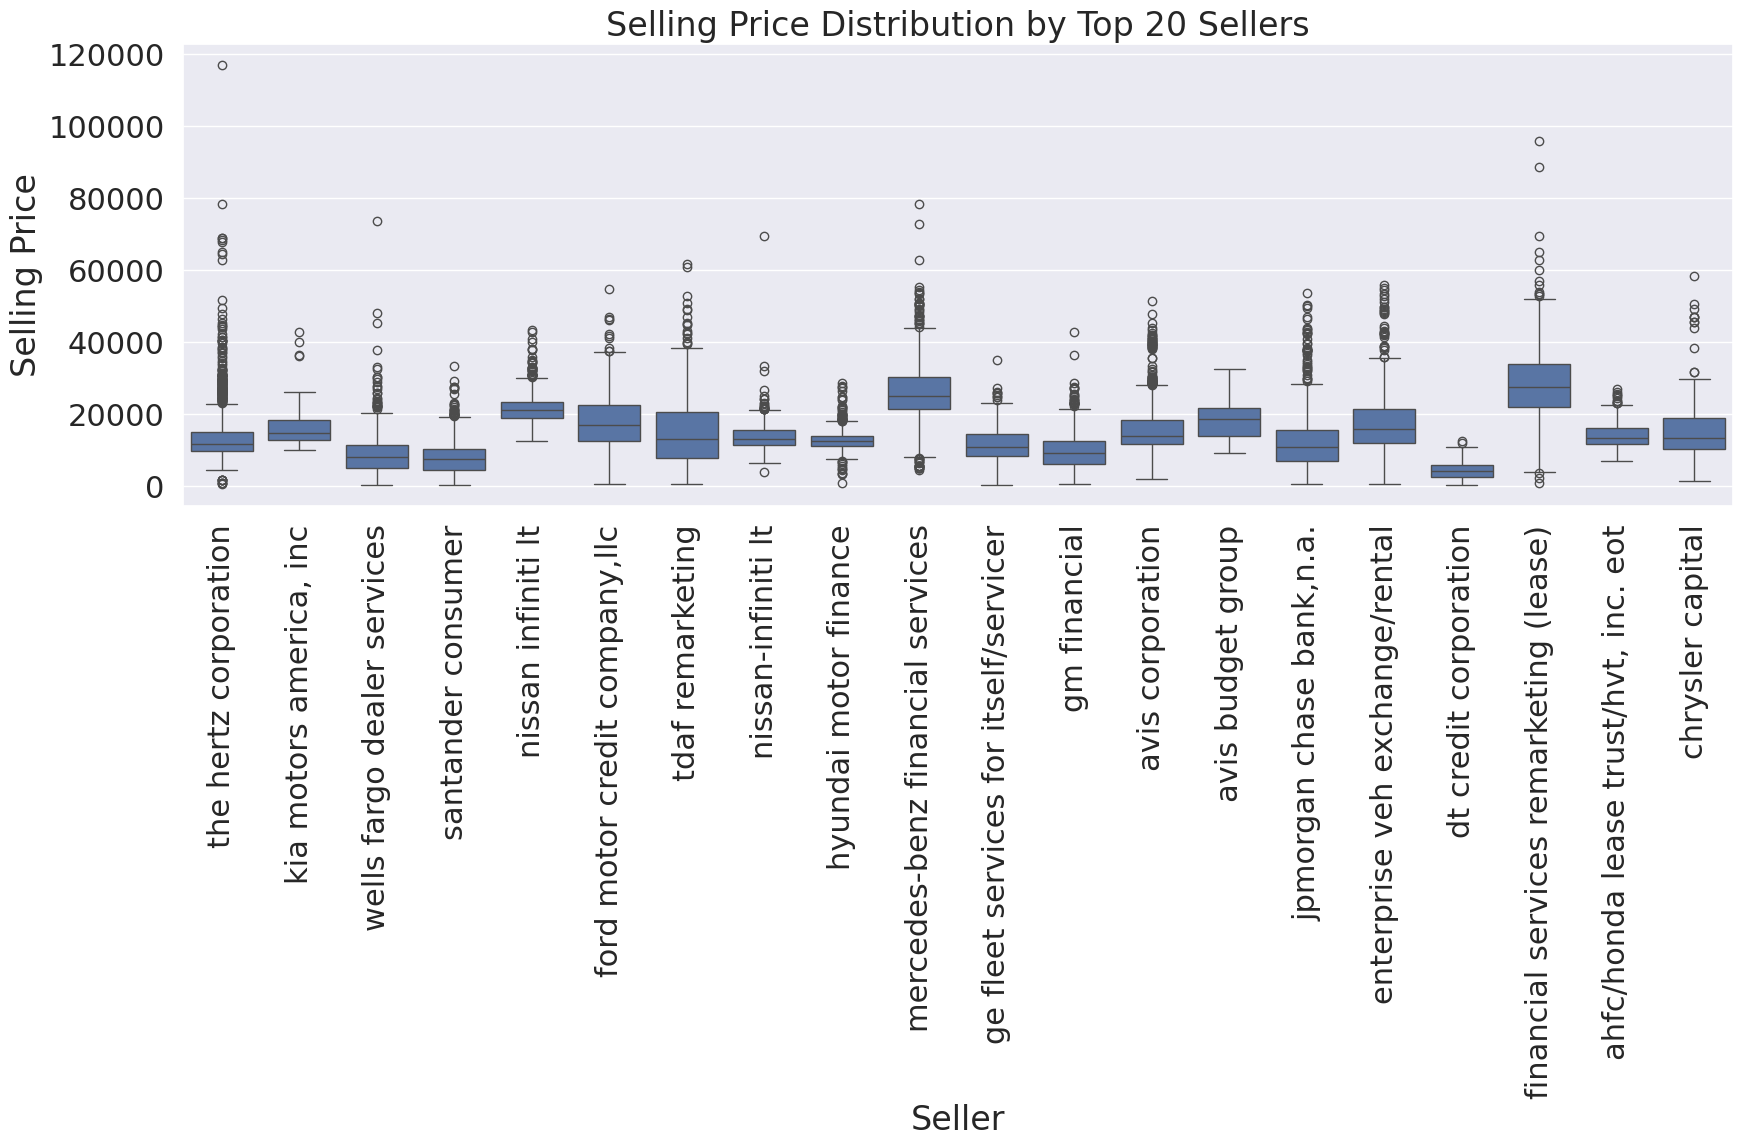

In [180]:
# prompt: box plot for columns body interior color state seller with selling price

plt.figure(figsize=(12, 6))
sns.boxplot(x='body', y='sellingprice', data=df)
plt.title('Selling Price Distribution by Body Type')
plt.xticks(rotation=90)
plt.xlabel('Body Type')
plt.ylabel('Selling Price')
plt.show()

plt.figure(figsize=(18, 6))
sns.boxplot(x='interior', y='sellingprice', data=df)
plt.title('Selling Price Distribution by Interior Color')
plt.xticks(rotation=90)
plt.xlabel('Interior Color')
plt.ylabel('Selling Price')
plt.show()

plt.figure(figsize=(18, 6))
sns.boxplot(x='color', y='sellingprice', data=df)
plt.title('Selling Price Distribution by Exterior Color')
plt.xticks(rotation=90)
plt.xlabel('Exterior Color')
plt.ylabel('Selling Price')
plt.show()

plt.figure(figsize=(20, 6))
sns.boxplot(x='state', y='sellingprice', data=df)
plt.title('Selling Price Distribution by State')
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Selling Price')
plt.show()

plt.figure(figsize=(20, 6))
# Selecting top sellers for better visualization due to the large number of sellers
top_sellers = df['seller'].value_counts().nlargest(20).index
sns.boxplot(x='seller', y='sellingprice', data=df[df['seller'].isin(top_sellers)])
plt.title('Selling Price Distribution by Top 20 Sellers')
plt.xticks(rotation=90)
plt.xlabel('Seller')
plt.ylabel('Selling Price')
plt.show()

### Feature Engineering


In [181]:
df['car_age'] = df['saledate'].dt.year - df['year'] + round(df['saledate'].dt.month / 12,2 )
df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,car_age
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404,black,gray,the hertz corporation,11000,10900,2015-06-01 19:30:00+00:00,2.50
1,2014,Toyota,4Runner,SR5,suv,automatic,jtezu5jr2e5064567,fl,4.9,17846,gray,black,award auto sales and leasing inc,28700,29900,2015-02-17 23:15:00+00:00,1.17
2,2012,Lexus,IS 250,Base,sedan,automatic,jthbf5c24c5168599,fl,4.1,21122,silver,black,lexus financial services,22200,24200,2015-01-19 17:30:00+00:00,3.08
3,2002,BMW,X5,4.4i,suv,automatic,5uxfb33562lh33864,fl,1.9,145303,black,black,peddle llc,3675,3200,2015-03-03 23:10:00+00:00,13.25
4,2014,Ford,E-Series Van,E-250,van,automatic,1ftne2ew0eda31832,wa,4.9,6714,white,gray,u-haul,22500,22100,2015-02-17 22:45:00+00:00,1.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46573,2013,Ford,Edge,SE,suv,automatic,2fmdk4gc2dbc03247,va,3.5,52844,black,gray,wheels exchange llc,15650,17000,2015-01-07 01:30:00+00:00,2.08
46574,2012,Infiniti,G Sedan,G37 Journey,sedan,automatic,jn1cv6ap9cm623162,ca,4.5,23185,black,black,nissan infiniti lt,19350,21500,2015-06-17 22:30:00+00:00,3.50
46575,2013,BMW,3 Series,328i,sedan,automatic,wba3a5c56df356614,tx,4.2,45357,white,beige,motorcars of south texas,22200,22000,2015-02-17 18:00:00+00:00,2.17
46576,2013,Toyota,Camry,LE,sedan,automatic,4t1bf1fk8du254684,ca,3.5,43376,black,beige,avis rac/san leandro,13400,13800,2015-01-13 20:30:00+00:00,2.08


In [182]:

from sklearn.preprocessing import MinMaxScaler

numerical_cols = df.select_dtypes(include=np.number).columns

cols_to_normalize = ['condition','odometer','car_age']

scaler = MinMaxScaler()
df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])

df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,car_age
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,0.725,0.123918,black,gray,the hertz corporation,11000,10900,2015-06-01 19:30:00+00:00,0.099325
1,2014,Toyota,4Runner,SR5,suv,automatic,jtezu5jr2e5064567,fl,0.975,0.043873,gray,black,award auto sales and leasing inc,28700,29900,2015-02-17 23:15:00+00:00,0.046484
2,2012,Lexus,IS 250,Base,sedan,automatic,jthbf5c24c5168599,fl,0.775,0.051927,silver,black,lexus financial services,22200,24200,2015-01-19 17:30:00+00:00,0.122368
3,2002,BMW,X5,4.4i,suv,automatic,5uxfb33562lh33864,fl,0.225,0.357231,black,black,peddle llc,3675,3200,2015-03-03 23:10:00+00:00,0.526420
4,2014,Ford,E-Series Van,E-250,van,automatic,1ftne2ew0eda31832,wa,0.975,0.016504,white,gray,u-haul,22500,22100,2015-02-17 22:45:00+00:00,0.046484


### Feature Selection


In [183]:
#drop columns vin year saledate mmr
df = df.drop(['vin','year','saledate','mmr','state','color','transmission'],axis=1)
df.head()

,make,model,trim,body,condition,odometer,interior,seller,sellingprice,car_age
0,Hyundai,Sonata,GLS,sedan,0.725,0.123918,gray,the hertz corporation,10900,0.099325
1,Toyota,4Runner,SR5,suv,0.975,0.043873,black,award auto sales and leasing inc,29900,0.046484
2,Lexus,IS 250,Base,sedan,0.775,0.051927,black,lexus financial services,24200,0.122368
3,BMW,X5,4.4i,suv,0.225,0.357231,black,peddle llc,3200,0.526420
4,Ford,E-Series Van,E-250,van,0.975,0.016504,gray,u-haul,22100,0.046484


In [184]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
numeric_df = df.select_dtypes(include=np.number)
x_numeric = numeric_df.drop('sellingprice', axis=1)

VIF_data = pd.DataFrame()
VIF_data['feature'] = x_numeric.columns
VIF_data['VIF'] = [variance_inflation_factor(x_numeric.values, i) for i in range(x_numeric.shape[1])]

VIF_data

,feature,VIF
0,condition,1.668754
1,odometer,6.880993
2,car_age,6.887846


### Encoding the data using one hot encoding since there is no ranking in the categorical columns unique values

In [185]:
df_encodedoh = pd.get_dummies(data=df, columns=df.select_dtypes(object).columns, dtype='int8',drop_first=True)
df_encodedoh

,condition,odometer,sellingprice,car_age,make_Aston Martin,make_Audi,make_BMW,make_Bentley,make_Buick,make_Cadillac,...,seller_zanger enterprises inc,seller_zappone chrysler jeep dodge inc,seller_zappone chrysler jeep dodge ram,seller_zeibak auto trading,seller_zeigler honda amherst,seller_zimbrick eastside,seller_zimbrick volkswagen of madison,seller_zimmerman auto brokers inc,seller_zinc auto finance,seller_zmax moto leasing inc
0,0.725,0.123918,10900,0.099325,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.975,0.043873,29900,0.046484,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.775,0.051927,24200,0.122368,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.225,0.357231,3200,0.526420,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.975,0.016504,22100,0.046484,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46573,0.625,0.129917,17000,0.082638,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46574,0.875,0.056999,21500,0.139054,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46575,0.800,0.111510,22000,0.086214,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46576,0.625,0.106639,13800,0.082638,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Splitting the data into testing and training data.**

In [186]:
from sklearn.model_selection import train_test_split

x = df_encodedoh.drop('sellingprice',axis=1) # Independent variable
y = df_encodedoh['sellingprice'] # Dependent variable

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=23)

print('Training dataset size:', x_train.shape[0])
print('Testing dataset size:', x_test.shape[0])

Training dataset size: 32600
Testing dataset size: 13972


In [187]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(x_train, y_train);

In [188]:
parameter = ['theta_0'] + ['theta_{}'.format(i+1) for i in range(x.shape[1])]
columns = ['y-intersect'] + list(x.columns.values)
sk_theta = pd.Series([lin_reg.intercept_] + list(lin_reg.coef_))

parameter_df = pd.DataFrame({'parameter':parameter,'column':columns, 'theta_value': sk_theta})
parameter_df

,parameter,column,theta_value
0,theta_0,y-intersect,32709.486641
1,theta_1,condition,4179.773987
2,theta_2,odometer,-18502.402660
3,theta_3,car_age,-26063.527096
4,theta_4,make_Aston Martin,12373.449295
...,...,...,...
6495,theta_6495,seller_zimbrick eastside,444.820479
6496,theta_6496,seller_zimbrick volkswagen of madison,532.840548
6497,theta_6497,seller_zimmerman auto brokers inc,-207.673382
6498,theta_6498,seller_zinc auto finance,-8827.693092


**Calculating the mean square error and R square values to gain insights on the performance of the model.**

In [189]:
# sklearn linear regression module
y_pred_sk = lin_reg.predict(x_test)

from sklearn.metrics import root_mean_squared_error
rmse = root_mean_squared_error(y_pred_sk, y_test)

# R_square
R_square_sk = lin_reg.score(x_test,y_test)
print('The Root Mean Square Error(MSE)  is: ', rmse)
print('R square is :', R_square_sk)

The Root Mean Square Error(MSE)  is:  3540.7894776178277
R square is : 0.8669255675132519


**We can see that the accurace of the model is 87% which is very good.**

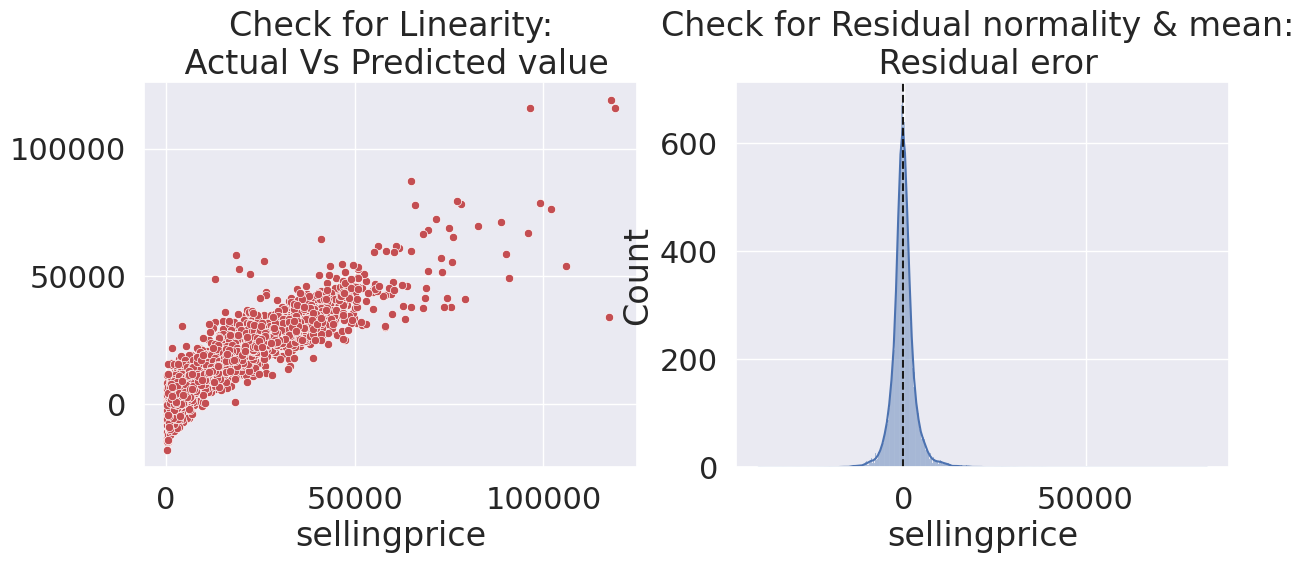

In [190]:

# Checking for linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(x=y_test, y=y_pred_sk, ax=ax, color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Checking for residual normality & mean
ax = f.add_subplot(122)
sns.histplot(x=(y_test - y_pred_sk), ax=ax, color='b', kde=True)
ax.axvline((y_test - y_pred_sk).mean(), color='k', linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

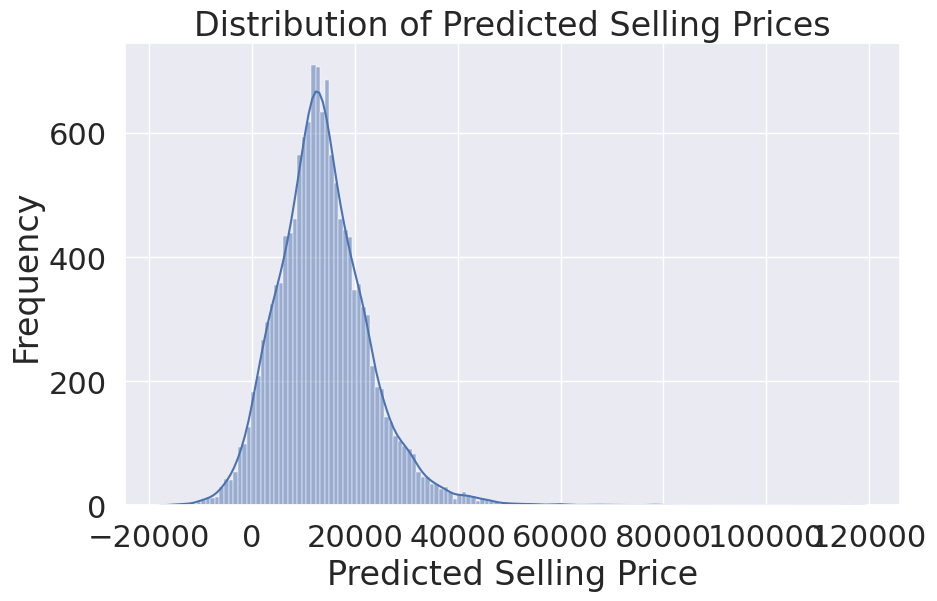

In [191]:
# prompt: show a histgoram of the predected values

plt.figure(figsize=(10, 6))
sns.histplot(y_pred_sk, kde=True)
plt.title('Distribution of Predicted Selling Prices')
plt.xlabel('Predicted Selling Price')
plt.ylabel('Frequency')
plt.show()

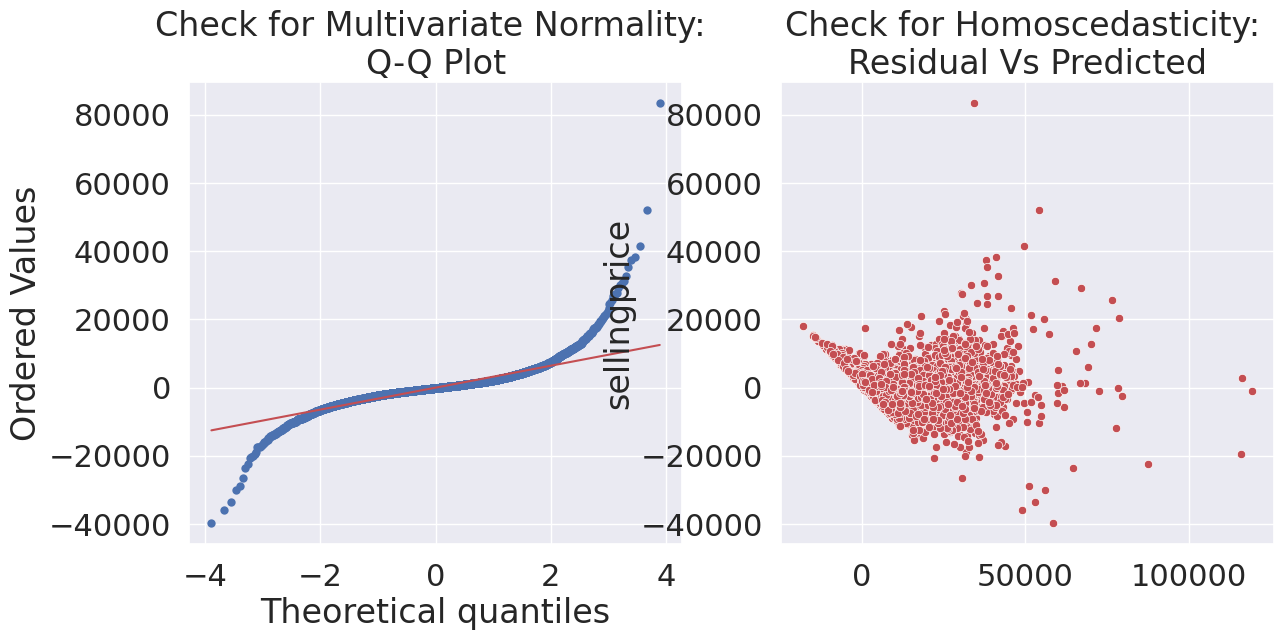

In [192]:
# Check for Multivariate Normality
# Quantile-Quantile plot
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_pred_sk), fit=True, plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(x=y_pred_sk, y=(y_test - y_pred_sk), ax=ax[1], color='r')
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');

In [193]:

#!pip install catboost

In [194]:
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

# Initialize models
xgb_reg = XGBRegressor(random_state=23)
cat_reg = CatBoostRegressor(random_state=23, verbose=0)

# Train XGBoost Regressor
xgb_reg.fit(x_train, y_train)
y_pred_xgb = xgb_reg.predict(x_test)
rmse_xgb = root_mean_squared_error(y_test, y_pred_xgb)
r2_xgb = xgb_reg.score(x_test, y_test)
print(f'XGBoost Regressor:')
print(f'  RMSE: {rmse_xgb}')
print(f'  R-squared: {r2_xgb}')

# Train CatBoost Regressor
cat_reg.fit(x_train, y_train)
y_pred_cat = cat_reg.predict(x_test)
rmse_cat = root_mean_squared_error(y_test, y_pred_cat)
r2_cat = cat_reg.score(x_test, y_test)
print(f'CatBoost Regressor:')
print(f'  RMSE: {rmse_cat}')
print(f'  R-squared: {r2_cat}')


XGBoost Regressor:
  RMSE: 3061.618408203125
  R-squared: 0.9005060791969299
CatBoost Regressor:
  RMSE: 2824.2752280313575
  R-squared: 0.9153341165439208
